In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#read in the general csv too
#df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/delta_scores.csv")

In [4]:
#read in the general csv too
df_general  = pd.read_csv("/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/triad_tyr_refined_placements_quarter_real_delta_scores.csv")

In [5]:
#get rid of weird 0 ddg values
df_general = df_general[df_general['ddg_compare'] != 0]

In [6]:
len(df_general)

40069

In [7]:
df_general

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37
0,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-000233659275/placements/7l1u_receptor_only_PV-000233659275_14_2.pdb,-18.893154,-10.672782,-8.220372,14.0,12.0,2.0,0,0,0.0,0.357143,0.083333,0.273810,2,2,0.0,-1.229020,-0.576196,-0.652824,100,100,0.0,0,0,0.0,0,0,0.0,96.234969,102.834355,-6.599386,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,7.215267,0.0,NaN
1,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-000233659275/placements/7l1u_receptor_only_PV-000233659275_126_1.pdb,-18.893154,-15.801484,-3.091670,14.0,8.0,6.0,0,0,0.0,0.357143,0.125000,0.232143,2,1,1.0,-1.229020,-0.643874,-0.585146,100,100,0.0,0,0,0.0,0,0,0.0,96.234969,92.679642,3.555327,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,1.932215,0.0,NaN
2,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-000233659275/placements/7l1u_receptor_only_PV-000233659275_2_1.pdb,-18.893154,-16.860133,-2.033021,14.0,12.0,2.0,0,0,0.0,0.357143,0.166667,0.190476,2,0,2.0,-1.229020,0.000000,-1.229020,100,100,0.0,0,0,0.0,0,0,0.0,96.234969,95.306534,0.928435,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,3.936988,0.0,NaN
3,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-000233659275/placements/7l1u_receptor_only_PV-000233659275_6_2.pdb,-18.893154,-12.055984,-6.837170,14.0,10.0,4.0,0,0,0.0,0.357143,0.100000,0.257143,2,0,2.0,-1.229020,0.000000,-1.229020,100,100,0.0,0,0,0.0,0,0,0.0,96.234969,98.044016,-1.809047,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,6.979145,0.0,NaN
4,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-0

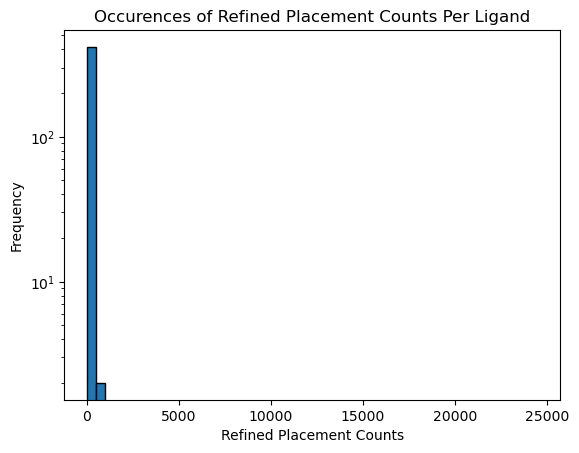

In [8]:
#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_general['file_initial'].value_counts()

bin_edges = np.arange(0, 25000, 500)

plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Refined Placement Counts')
plt.ylabel('Frequency')
plt.title('Occurences of Refined Placement Counts Per Ligand')

# Show the plot
plt.show()

In [9]:
# Extract ligand names using a regular expression
df_general['ligand_name'] = df_general['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands_general = df_general['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 388


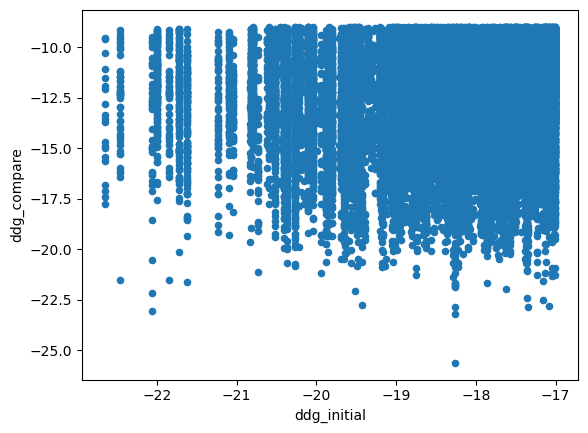

In [10]:
df_general.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
plt.show()

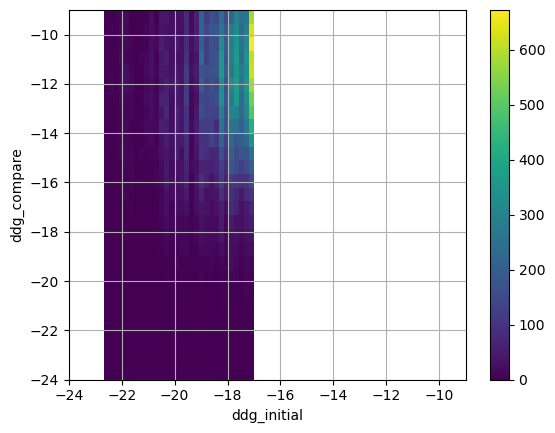

In [11]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df_general['ddg_initial']
y = df_general['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

#plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')

plt.colorbar()

plt.ylim(-24,-9)
plt.xlim(-24,-9)

plt.grid(True)
plt.show()

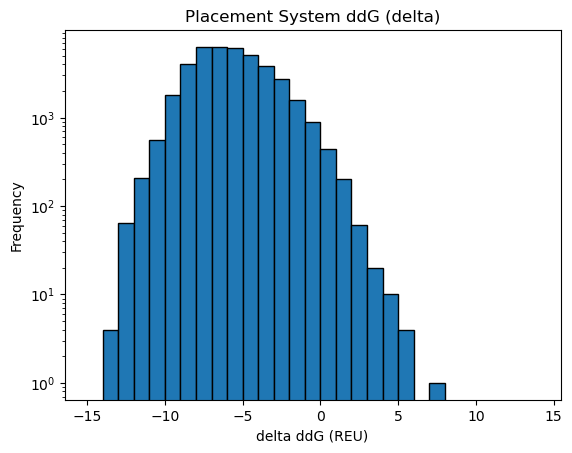

In [12]:
#plot the delta ddg in histogram
x = df_general['ddg_delta']
#set labels and title
plt.xlabel('delta ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-15, 15, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

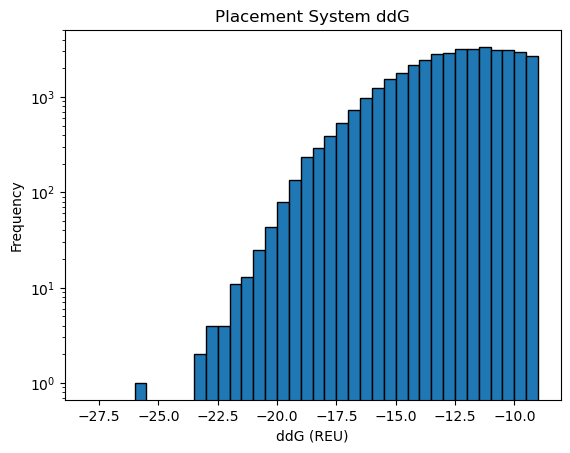

In [13]:
#plot the delta ddg in histogram
x = df_general['ddg_compare']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-28, -8.5, 0.5)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

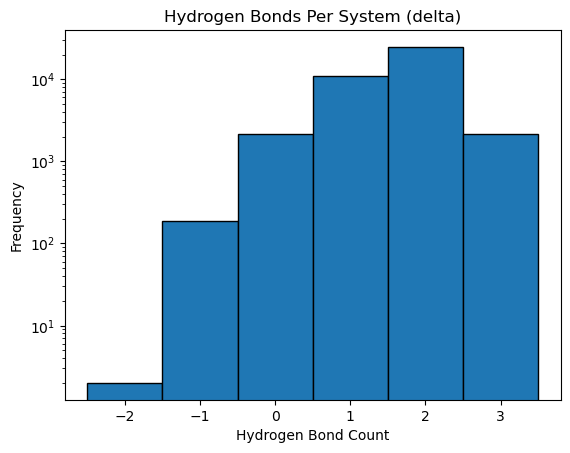

In [14]:
#plot the delta ddg in histogram
x = df_general['hbond_motif_count_delta']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

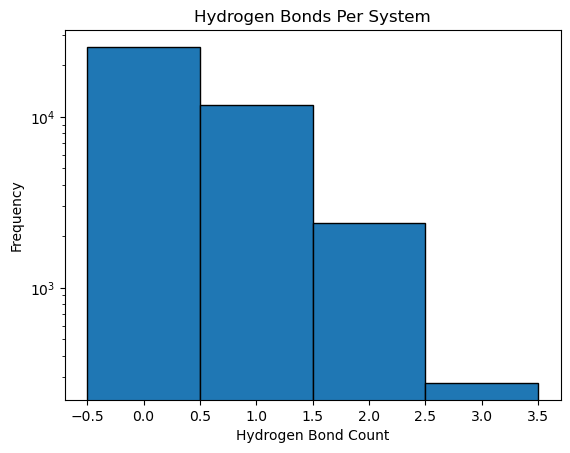

In [15]:
#plot the delta ddg in histogram
x = df_general['hbond_motif_count_compare']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

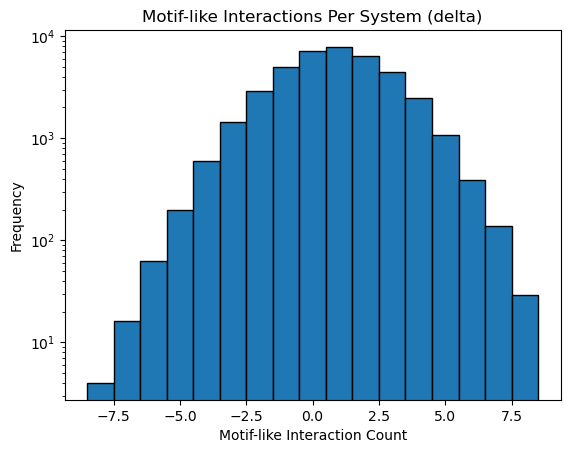

In [16]:
#plot the delta ddg in histogram
x = df_general['total_motifs_delta']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

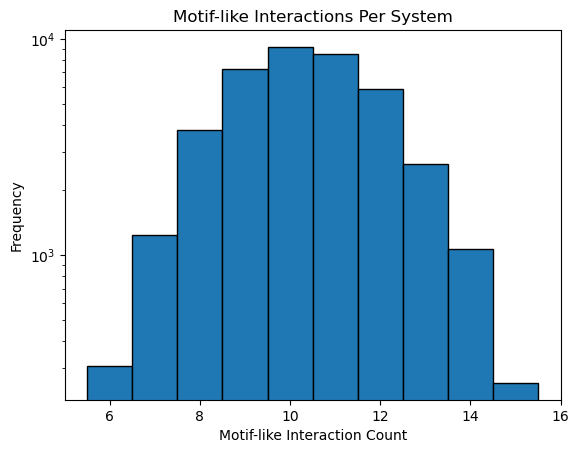

In [17]:
#plot the delta ddg in histogram
x = df_general['total_motifs_compare']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

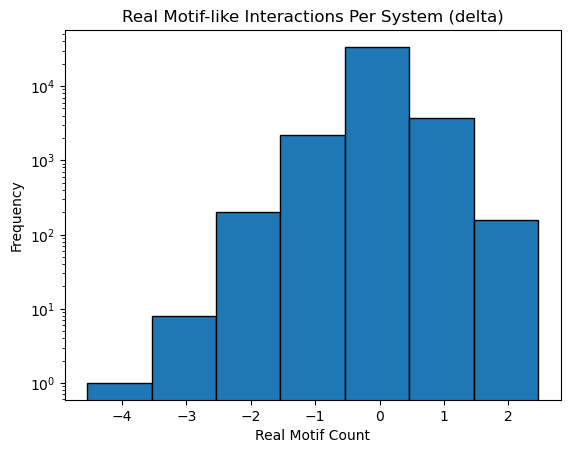

In [18]:
#plot the delta ddg in histogram
x = df_general['total_motifs_delta'] * df_general['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

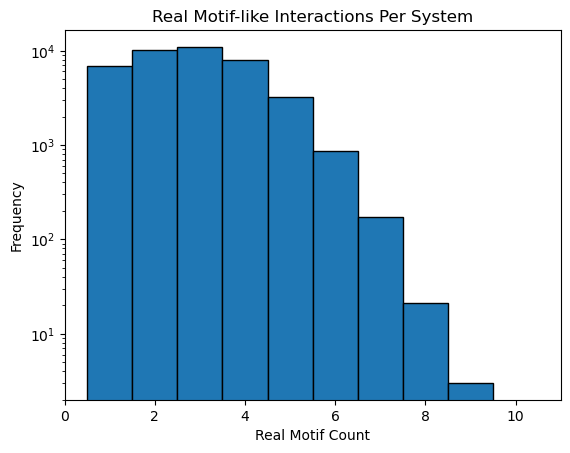

In [19]:
#plot the delta ddg in histogram
x = df_general['total_motifs_compare'] * df_general['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

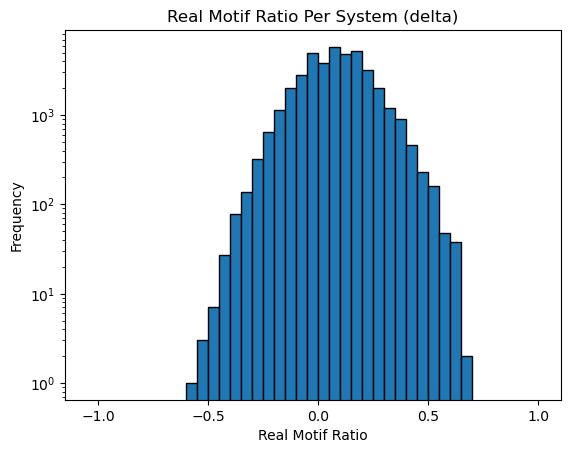

In [20]:
#plot the delta ddg in histogram
x = df_general['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-1.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

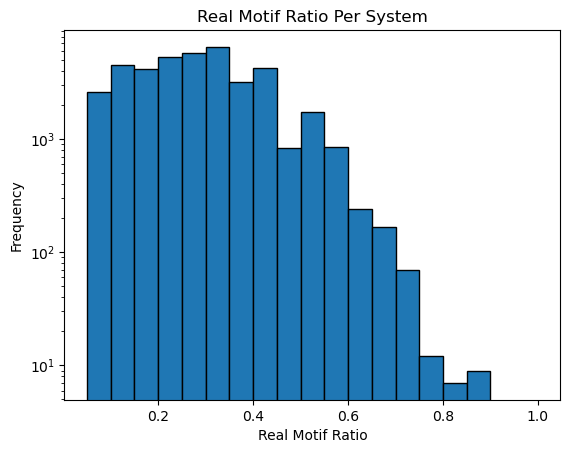

In [21]:
#plot the delta ddg in histogram
x = df_general['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

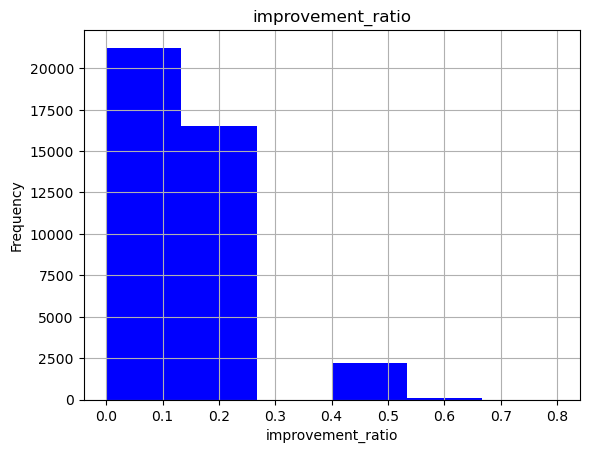

In [22]:
#plot the delta ddg in histogram
x = df_general['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=6, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [23]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered = df_general[(df_general['hbond_motif_count_compare'] >= 3) & (df_general['rmsd'] <= 4) & (df_general['real_motif_ratio_compare'] >= 0.25) & (df_general['ddg_delta'] > 0) & (df_general['ddg_compare'] <= -15)]

In [24]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
4895,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-003268960715/placements/7l1u_receptor_only_PV-003268960715_87_0.pdb,-19.637469,-20.190621,0.553152,14.0,13.0,1.0,0,0,0.0,0.357143,0.384615,-0.027472,2,3,-1.0,-0.923477,-1.238921,0.315444,100,100,0.0,0,0,0.0,0,0,0.0,95.796197,94.955073,0.841124,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,0.404934,0.6,NaN,PV-003268960715
7030,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-004089081001/placements/7l1u_receptor_only_PV-004089081001_32_0.pdb,-18.564987,-19.552340,0.987353,11.0,10.0,1.0,0,0,0.0,0.545455,0.400000,0.145455,2,3,-1.0,-1.876809,-3.179720,1.302911,100,100,0.0,0,0,0.0,0,0,0.0,93.103659,90.667940,2.435719,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,0.467106,0.4,NaN,PV-004089081001
7054,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-004089081001/placements/7l1u_receptor_only_PV-004089081001_159_4.pdb,-18.564987,-20.080524,1.515537,11.0,11.0,0.0,0,0,0.0,0.545455,0.454545,0.090910,2,3,-1.0,-1.876809,-3.072994,1.196185,100,100,0.0,0,0,0.0,0,0,0.0,93.103659,91.301027,1.802632,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,0.792216,0.4,NaN,PV-004089081001
7140,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_3.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-004089081001/placements/7l1u_receptor_only_PV-004089081001_34_0.pdb,-17.388758,-17.434299,0.045541,11.0,11.0,0.0,0,0,0.0,0.363636,0.363636,0.000000,3,3,0.0,-2.072492,-2.221583,0.149091,100,100,0.0,0,0,0.0,0,0,0.0,94.902386,94.707754,0.194632,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_3.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_3.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_3.pdb,1.206971,0.2,NaN,PV-004089081001
7154,/data/projec

In [25]:
len(df_general_filtered)

40

In [26]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered_lite = df_general[(df_general['real_motif_ratio_compare'] >= 0.5)]

In [27]:
df_general_filtered_lite

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
22,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-000233659275/placements/7l1u_receptor_only_PV-000233659275_176_4.pdb,-18.893154,-12.167629,-6.725525,14.0,6.0,8.0,0,0,0.0,0.357143,0.500000,-0.142857,2,0,2.0,-1.229020,0.000000,-1.229020,100,100,0.0,0,0,0.0,0,0,0.0,96.234969,94.332371,1.902598,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11867/placements/7l1u_receptor_only_PV-000233659275_1_0.pdb,3.587462,0.2,NaN,PV-000233659275
214,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-000233918726/placements/7l1u_receptor_only_PV-000233918726_164_0.pdb,-18.003141,-14.154558,-3.848583,14.0,6.0,8.0,0,0,0.0,0.285714,0.500000,-0.214286,2,0,2.0,-1.181128,0.000000,-1.181128,100,100,0.0,0,0,0.0,0,0,0.0,97.101445,92.345442,4.756003,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,3.602514,0.2,NaN,PV-000233918726
223,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-000233918726/placements/7l1u_receptor_only_PV-000233918726_176_6.pdb,-18.003141,-14.616651,-3.386490,14.0,8.0,6.0,0,0,0.0,0.285714,0.500000,-0.214286,2,0,2.0,-1.181128,0.000000,-1.181128,100,100,0.0,0,0,0.0,0,0,0.0,97.101445,93.883349,3.218096,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,3.695231,0.2,NaN,PV-000233918726
229,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-000233918726/placements/7l1u_receptor_only_PV-000233918726_161_0.pdb,-18.003141,-14.533581,-3.469560,14.0,10.0,4.0,0,0,0.0,0.285714,0.500000,-0.214286,2,0,2.0,-1.181128,0.000000,-1.181128,100,100,0.0,0,0,0.0,0,0,0.0,97.101445,95.966419,1.135026,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11655/placements/7l1u_receptor_only_PV-000233918726_4_0.pdb,3.833775,0.2,NaN,PV-000233918726
23

In [28]:
len(df_general_filtered_lite)

3099

In [29]:
#get a count on the number of placements that are very close to the original placement
df_recoveries = df_general

#get rid of weird 0 ddg values
df_recoveries = df_recoveries[df_recoveries['ddg_compare'] != 0]

df_recoveries = df_recoveries[df_recoveries['rmsd'] < 1]

In [30]:
len(df_recoveries)

1000

In [31]:
#aggregate by file_initial
closest_recovery_general_df = df_general.loc[df_general.groupby('file_initial')['rmsd'].idxmin()]

In [32]:
len(closest_recovery_general_df)

418

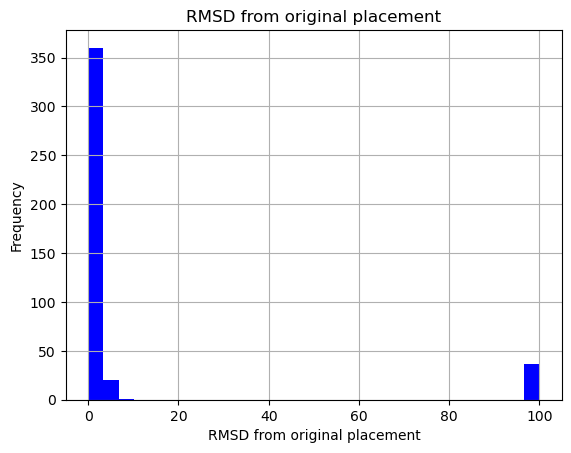

In [33]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['rmsd']
#set labels and title
plt.xlabel('RMSD from original placement')
plt.ylabel('Frequency')
plt.title('RMSD from original placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [34]:
systems_with_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_with_a_close_recovery_df = systems_with_a_close_recovery_df[systems_with_a_close_recovery_df['rmsd'] < 4]
len(systems_with_a_close_recovery_df)

369

In [35]:
len(systems_with_a_close_recovery_df)/len(closest_recovery_general_df)

0.8827751196172249

In [36]:
systems_with_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
17634,/data/project/thymelab/triad_pulldown_tyr220/10025/placements/7l1u_receptor_only_PV-005614842259_4_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-005614842259/placements/7l1u_receptor_only_PV-005614842259_48_0.pdb,-17.490910,-15.502592,-1.988318,11.0,12.0,-1.0,0,0,0.0,0.272727,0.333333,-0.060606,2,2,0.0,-2.497103,-1.854998,-0.642105,100,100,0.0,0,0,0.0,0,0,0.0,93.284714,96.975743,-3.691029,/data/project/thymelab/triad_pulldown_tyr220/10025/placements/7l1u_receptor_only_PV-005614842259_4_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/10025/placements/7l1u_receptor_only_PV-005614842259_4_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/10025/placements/7l1u_receptor_only_PV-005614842259_4_2.pdb,0.926276,0.4,NaN,PV-005614842259
17973,/data/project/thymelab/triad_pulldown_tyr220/10085/placements/7l1u_receptor_only_PV-005663725640_6_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-005663725640/placements/7l1u_receptor_only_PV-005663725640_12_2.pdb,-19.449740,-14.351650,-5.098090,11.0,10.0,1.0,0,0,0.0,0.363636,0.500000,-0.136364,2,1,1.0,-2.811451,-0.620241,-2.191210,100,100,0.0,0,0,0.0,0,0,0.0,91.102445,96.528109,-5.425664,/data/project/thymelab/triad_pulldown_tyr220/10085/placements/7l1u_receptor_only_PV-005663725640_6_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/10085/placements/7l1u_receptor_only_PV-005663725640_6_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/10085/placements/7l1u_receptor_only_PV-005663725640_6_0.pdb,1.739522,0.2,NaN,PV-005663725640
17995,/data/project/thymelab/triad_pulldown_tyr220/10151/placements/7l1u_receptor_only_PV-005718424465_13_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-005718424465/placements/7l1u_receptor_only_PV-005718424465_144_0.pdb,-18.848170,-13.182680,-5.665490,11.0,12.0,-1.0,0,0,0.0,0.272727,0.166667,0.106060,2,1,1.0,-1.079651,-0.049064,-1.030587,100,100,0.0,0,0,0.0,0,0,0.0,93.344906,99.934923,-6.590017,/data/project/thymelab/triad_pulldown_tyr220/10151/placements/7l1u_receptor_only_PV-005718424465_13_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/10151/placements/7l1u_receptor_only_PV-005718424465_13_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/10151/placements/7l1u_receptor_only_PV-005718424465_13_0.pdb,2.284921,0.2,NaN,PV-005718424465
18024,/data/project/thymelab/triad_pulldown_tyr220/10151/placements/7l1u_receptor_only_PV-005718424465_13_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-005718424465/placements/7l1u_receptor_only_PV-005718424465_144_0.pdb,-18.618592,-13.182680,-5.435912,12.0,12.0,0.0,0,0,0.0,0.250000,0.166667,0.083333,2,1,1.0,-0.751922,-0.049064,-0.702858,100,100,0.0,0,0,0.0,0,0,0.0,94.879486,99.934923,-5.055437,/data/project/thymelab/triad_pulldown_tyr220/10151/placements/7l1u_receptor_only_PV-005718424465_13_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10151/placements/7l1u_receptor_only_PV-005718424465_13_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10151/placements/7l1u_receptor_only_PV-005718424465_13_1.pdb,2.409313,

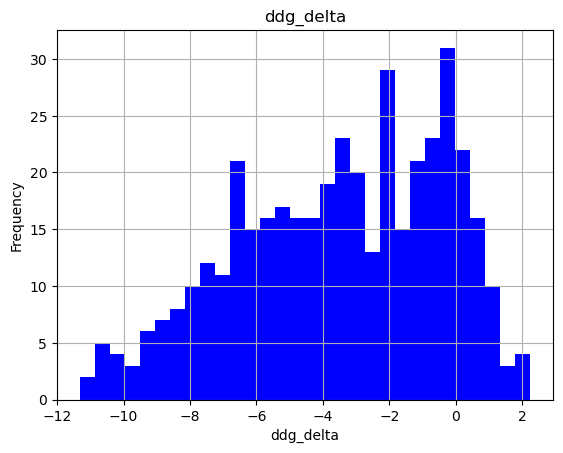

In [37]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [38]:
#grab the systems that did not recover and take a look
systems_without_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_without_a_close_recovery_df = systems_without_a_close_recovery_df[systems_without_a_close_recovery_df['rmsd'] > 4]
len(systems_without_a_close_recovery_df)

49

In [39]:
len(systems_without_a_close_recovery_df)/len(closest_recovery_general_df)

0.11722488038277512

In [40]:
systems_without_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
18159,/data/project/thymelab/triad_pulldown_tyr220/10190/placements/7l1u_receptor_only_PV-005751335134_12_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-005751335134/placements/7l1u_receptor_only_PV-005751335134_65_0.pdb,-19.946752,-9.396942,-10.549810,10.0,12.0,-2.0,0,0,0.0,0.400000,0.166667,0.233333,2,0,2.0,-1.148101,0.000000,-1.148101,100,100,0.0,0,0,0.0,0,0,0.0,91.305147,102.769725,-11.464578,/data/project/thymelab/triad_pulldown_tyr220/10190/placements/7l1u_receptor_only_PV-005751335134_12_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/10190/placements/7l1u_receptor_only_PV-005751335134_12_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/10190/placements/7l1u_receptor_only_PV-005751335134_12_0.pdb,4.847909,0.2,NaN,PV-005751335134
23194,/data/project/thymelab/triad_pulldown_tyr220/11003/placements/7l1u_receptor_only_PV-006432646483_4_5.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-006432646483/placements/7l1u_receptor_only_PV-006432646483_143_0.pdb,-17.207308,-13.084687,-4.122621,12.0,13.0,-1.0,0,0,0.0,0.250000,0.076923,0.173077,2,2,0.0,-1.716033,-0.620768,-1.095265,100,100,0.0,0,0,0.0,0,0,0.0,95.326659,101.371468,-6.044809,/data/project/thymelab/triad_pulldown_tyr220/11003/placements/7l1u_receptor_only_PV-006432646483_4_5.pdb,/data/project/thymelab/triad_pulldown_tyr220/11003/placements/7l1u_receptor_only_PV-006432646483_4_5.pdb,/data/project/thymelab/triad_pulldown_tyr220/11003/placements/7l1u_receptor_only_PV-006432646483_4_5.pdb,100.000000,0.2,NaN,PV-006432646483
23660,/data/project/thymelab/triad_pulldown_tyr220/11107/placements/7l1u_receptor_only_PV-006520195873_1_4.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-006520195873/placements/7l1u_receptor_only_PV-006520195873_55_20.pdb,-17.753370,-10.803002,-6.950368,12.0,12.0,0.0,0,0,0.0,0.250000,0.083333,0.166667,2,0,2.0,-1.017105,0.000000,-1.017105,100,100,0.0,0,0,0.0,0,0,0.0,95.479525,101.280331,-5.800806,/data/project/thymelab/triad_pulldown_tyr220/11107/placements/7l1u_receptor_only_PV-006520195873_1_4.pdb,/data/project/thymelab/triad_pulldown_tyr220/11107/placements/7l1u_receptor_only_PV-006520195873_1_4.pdb,/data/project/thymelab/triad_pulldown_tyr220/11107/placements/7l1u_receptor_only_PV-006520195873_1_4.pdb,100.000000,0.0,NaN,PV-006520195873
24716,/data/project/thymelab/triad_pulldown_tyr220/11311/placements/7l1u_receptor_only_PV-006692573888_10_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-006692573888/placements/7l1u_receptor_only_PV-006692573888_158_2.pdb,-19.074369,-12.713826,-6.360543,12.0,12.0,0.0,0,0,0.0,0.250000,0.166667,0.083333,2,1,1.0,-1.964312,-0.143722,-1.820590,100,100,0.0,0,0,0.0,0,0,0.0,93.211319,100.309119,-7.097800,/data/project/thymelab/triad_pulldown_tyr220/11311/placements/7l1u_receptor_only_PV-006692573888_10_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/11311/placements/7l1u_receptor_only_PV-006692573888_10_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/11311/placements/7l1u_receptor_only_PV-006692573888_10_1.pdb,7.2

In [41]:
#get close rmsd placements with overall improvements
df_general_complete_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 1)]
len(df_general_complete_improvements)
df_general_complete_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name


In [42]:
#get close rmsd placements with overall improvements
df_general_0_8_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 0.8)]
len(df_general_0_8_improvements)
df_general_0_8_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
34209,/data/project/thymelab/triad_pulldown_tyr220/331/placements/7l1u_receptor_only_Z3474884733_9_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/Z3474884733/placements/7l1u_receptor_only_Z3474884733_207_13.pdb,-17.606374,-19.756916,2.150542,10.0,11.0,-1.0,0,0,0.0,0.3,0.636364,-0.336364,2,3,-1.0,-0.944935,-2.053076,1.108141,100,100,0.0,0,0,0.0,0,0,0.0,93.748691,92.826372,0.922319,/data/project/thymelab/triad_pulldown_tyr220/331/placements/7l1u_receptor_only_Z3474884733_9_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/331/placements/7l1u_receptor_only_Z3474884733_9_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/331/placements/7l1u_receptor_only_Z3474884733_9_6.pdb,0.78711,0.8,NaN,Z3474884733


In [43]:
#get close rmsd placements with overall improvements
df_general_high_hbonds = df_general[(df_general['rmsd'] <= 4) & (df_general['hbond_motif_count_delta'] <= -1) & (df_general['hbond_motif_count_compare'] >= 3) & (df_general['ddg_delta'] >= 0) & (df_general['ddg_compare'] <= -15) & (df_general['real_motif_ratio_compare'] >= 0.25)]
len(df_general_high_hbonds)


28

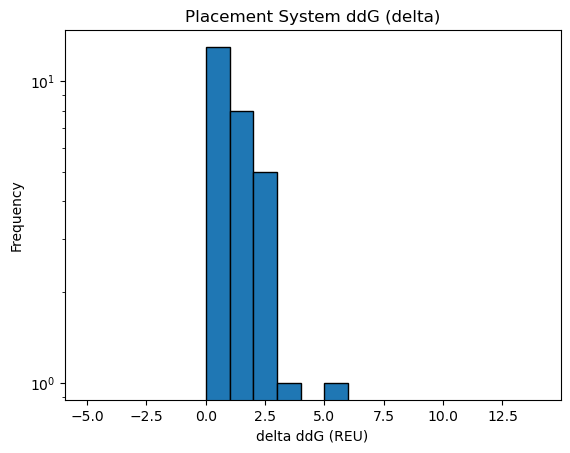

In [44]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_delta']
#set labels and title
plt.xlabel('delta ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-5, 15, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

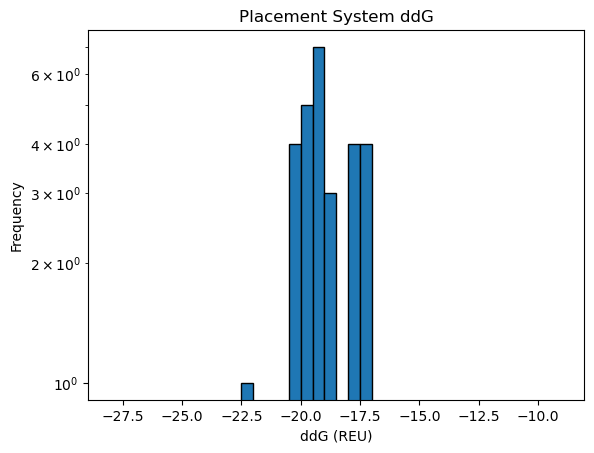

In [45]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-28, -8.5, 0.5)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

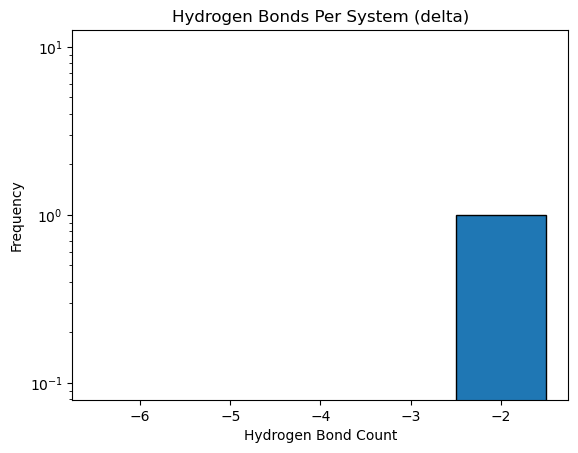

In [46]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['hbond_motif_count_delta']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-6.5, -0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

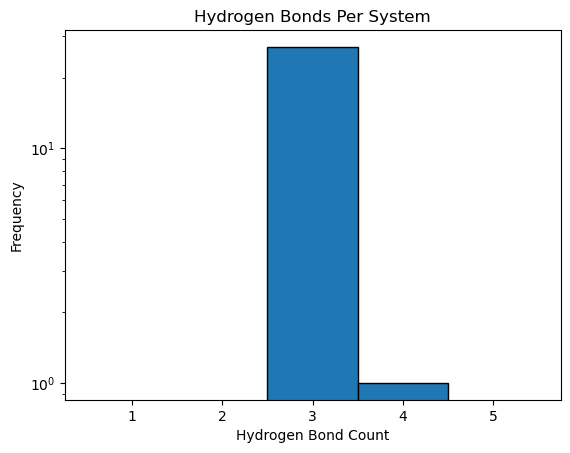

In [47]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['hbond_motif_count_compare']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.5, 6, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

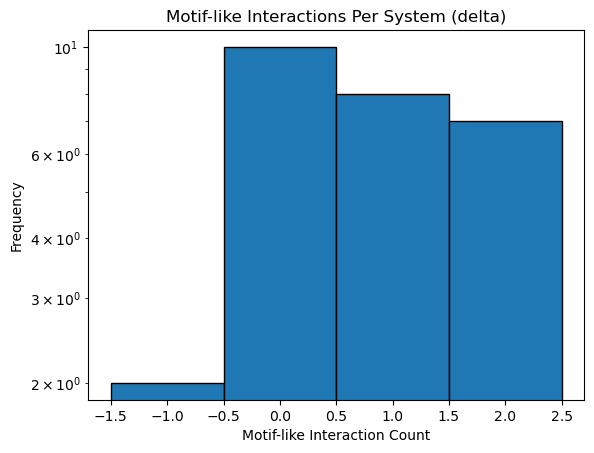

In [48]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_delta']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

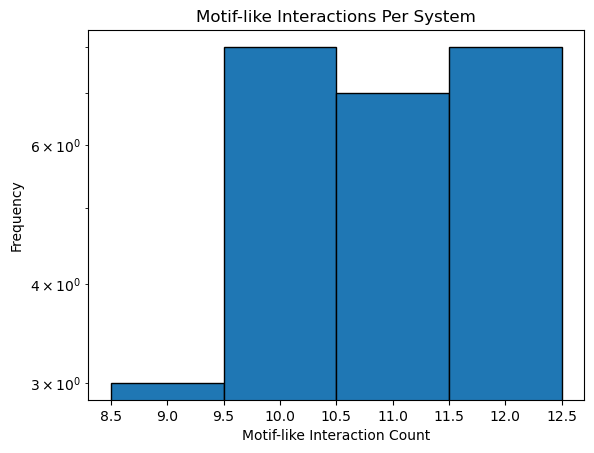

In [49]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_compare']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

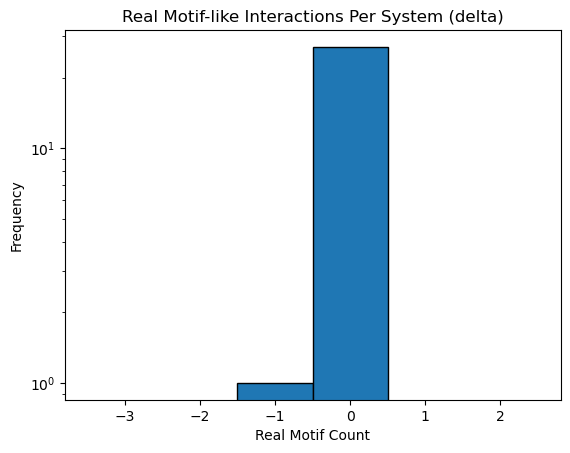

In [50]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_delta'] * df_general_high_hbonds['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-3.5, 3, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

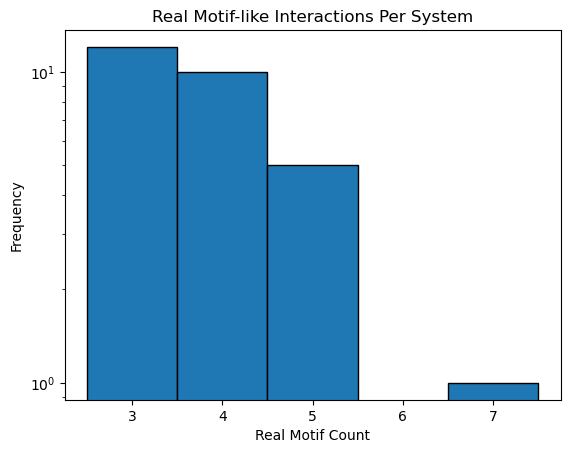

In [51]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_compare'] * df_general_high_hbonds['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

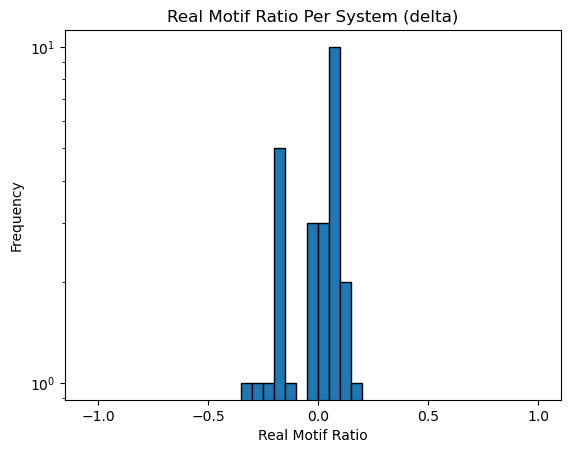

In [52]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-1.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

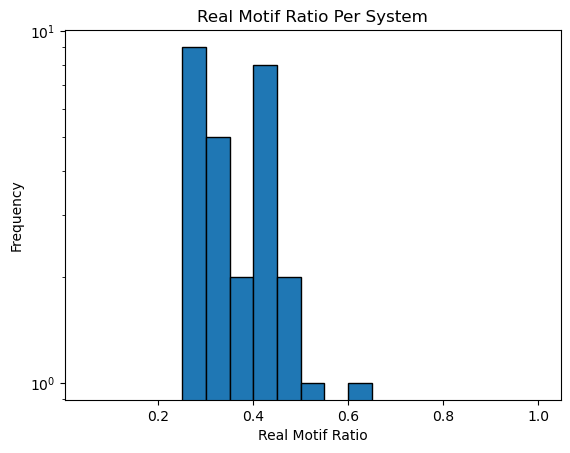

In [53]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

In [54]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
4895,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-003268960715/placements/7l1u_receptor_only_PV-003268960715_87_0.pdb,-19.637469,-20.190621,0.553152,14.0,13.0,1.0,0,0,0.0,0.357143,0.384615,-0.027472,2,3,-1.0,-0.923477,-1.238921,0.315444,100,100,0.0,0,0,0.0,0,0,0.0,95.796197,94.955073,0.841124,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,0.404934,0.6,NaN,PV-003268960715
7030,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-004089081001/placements/7l1u_receptor_only_PV-004089081001_32_0.pdb,-18.564987,-19.552340,0.987353,11.0,10.0,1.0,0,0,0.0,0.545455,0.400000,0.145455,2,3,-1.0,-1.876809,-3.179720,1.302911,100,100,0.0,0,0,0.0,0,0,0.0,93.103659,90.667940,2.435719,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,0.467106,0.4,NaN,PV-004089081001
7054,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-004089081001/placements/7l1u_receptor_only_PV-004089081001_159_4.pdb,-18.564987,-20.080524,1.515537,11.0,11.0,0.0,0,0,0.0,0.545455,0.454545,0.090910,2,3,-1.0,-1.876809,-3.072994,1.196185,100,100,0.0,0,0,0.0,0,0,0.0,93.103659,91.301027,1.802632,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,0.792216,0.4,NaN,PV-004089081001
7140,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_3.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-004089081001/placements/7l1u_receptor_only_PV-004089081001_34_0.pdb,-17.388758,-17.434299,0.045541,11.0,11.0,0.0,0,0,0.0,0.363636,0.363636,0.000000,3,3,0.0,-2.072492,-2.221583,0.149091,100,100,0.0,0,0,0.0,0,0,0.0,94.902386,94.707754,0.194632,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_3.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_3.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_3.pdb,1.206971,0.2,NaN,PV-004089081001
7154,/data/projec

In [55]:
len(df_general_filtered)

40

In [56]:
#filter the general so that it only has the lowest ddg for each ligand
df_filtered = df_general_filtered.loc[df_general_filtered.groupby("ligand_name")["ddg_compare"].idxmin()]
df_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
4895,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-003268960715/placements/7l1u_receptor_only_PV-003268960715_87_0.pdb,-19.637469,-20.190621,0.553152,14.0,13.0,1.0,0,0,0.0,0.357143,0.384615,-0.027472,2,3,-1.0,-0.923477,-1.238921,0.315444,100,100,0.0,0,0,0.0,0,0,0.0,95.796197,94.955073,0.841124,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/1783/placements/7l1u_receptor_only_PV-003268960715_7_0.pdb,0.404934,0.6,NaN,PV-003268960715
7054,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-004089081001/placements/7l1u_receptor_only_PV-004089081001_159_4.pdb,-18.564987,-20.080524,1.515537,11.0,11.0,0.0,0,0,0.0,0.545455,0.454545,0.090910,2,3,-1.0,-1.876809,-3.072994,1.196185,100,100,0.0,0,0,0.0,0,0,0.0,93.103659,91.301027,1.802632,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/5826/placements/7l1u_receptor_only_PV-004089081001_1_1.pdb,0.792216,0.4,NaN,PV-004089081001
9402,/data/project/thymelab/triad_pulldown_tyr220/7017/placements/7l1u_receptor_only_PV-004400168475_9_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-004400168475/placements/7l1u_receptor_only_PV-004400168475_222_0.pdb,-17.359706,-22.426282,5.066576,12.0,10.0,2.0,0,0,0.0,0.250000,0.400000,-0.150000,2,3,-1.0,-1.155784,-2.557829,1.402045,100,100,0.0,0,0,0.0,0,0,0.0,95.734510,88.415889,7.318621,/data/project/thymelab/triad_pulldown_tyr220/7017/placements/7l1u_receptor_only_PV-004400168475_9_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/7017/placements/7l1u_receptor_only_PV-004400168475_9_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/7017/placements/7l1u_receptor_only_PV-004400168475_9_1.pdb,2.320484,0.6,NaN,PV-004400168475
11810,/data/project/thymelab/triad_pulldown_tyr220/3265/placements/7l1u_receptor_only_PV-004784183830_9_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/PV-004784183830/placements/7l1u_receptor_only_PV-004784183830_38_1.pdb,-19.040721,-19.895611,0.854890,12.0,12.0,0.0,0,0,0.0,0.416667,0.250000,0.166667,2,3,-1.0,-2.233215,-1.955185,-0.278030,100,100,0.0,0,0,0.0,0,0,0.0,93.142731,93.399204,-0.256473,/data/project/thymelab/triad_pulldown_tyr220/3265/placements/7l1u_receptor_only_PV-004784183830_9_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/3265/placements/7l1u_receptor_only_PV-004784183830_9_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/3265/placements/7l1u_receptor_only_PV-004784183830_9_1.pdb,0.993558,0.4,NaN,PV-004784183830
14214,/data

In [57]:
# Extract ligand names using a regular expression
df_filtered['ligand_name'] = df_filtered['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands = df_filtered['ligand_name'].unique()
num_unique_ligands = len(unique_ligands)

# Display the unique ligand names and the count
print("Unique Ligand Names:", unique_ligands)
print("Number of Unique Ligands:", num_unique_ligands)

Unique Ligand Names: ['PV-003268960715' 'PV-004089081001' 'PV-004400168475' 'PV-004784183830'
 'PV-005140107893' 'PV-005303877587' 'PV-005484108139' 'PV-005497065978'
 'PV-005785383444' 'PV-006008764221' 'Z1271390920' 'Z3010497941'
 'Z3010501845' 'Z3408050766' 'Z3474884733' 'Z3598999257' 'Z4126269790'
 'Z4204529031']
Number of Unique Ligands: 18


In [99]:
"""
for i in df_general_high_hbonds['file_initial']:
    #print(i['file_initial'], i['file_compare'])
    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")
"""

'\nfor i in df_general_high_hbonds[\'file_initial\']:\n    #print(i[\'file_initial\'], i[\'file_compare\'])\n    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")\n'

In [58]:
line_counter = 0
folder_counter = 0

destination = "/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol"
if destination.endswith("/") == False:
    destination = destination + "/"

for index, row in df_filtered.iterrows():
    
    #make a string of line counter to be 5 digits long
    my_str = str(line_counter)
    while len(my_str) < 5:
        my_str = "0" + my_str
    
    os.system("mkdir " + destination + str(folder_counter))
    #print("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    
    new_init = my_str + "_initial_" + row['file_initial'].split("/")[len(row['file_initial'].split("/")) - 1]
    new_comp = my_str + "_compare_" + row['file_compare'].split("/")[len(row['file_compare'].split("/")) - 1]
    
    print(new_init, new_comp)
    
    #os.system("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    os.system("cp " + row['file_initial'] + " " + destination + str(folder_counter) + "/" + new_init)
    os.system("cp " + row['file_compare'] + " " + destination + str(folder_counter) + "/" + new_comp)
    os.system("sleep 0.1")
    
    line_counter = line_counter + 1
    
    if line_counter % 50 == 0:
        folder_counter = folder_counter + 1
        
#write the df_general_high_hbonds to csv
df_filtered.to_csv(destination + 'tyr_triad_refined_placements_quarter_real_best_improved_placements_sheet.csv', index=False)

00000_initial_7l1u_receptor_only_PV-003268960715_7_0.pdb 00000_compare_7l1u_receptor_only_PV-003268960715_87_0.pdb
00001_initial_7l1u_receptor_only_PV-004089081001_1_1.pdb 00001_compare_7l1u_receptor_only_PV-004089081001_159_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00002_initial_7l1u_receptor_only_PV-004400168475_9_1.pdb 00002_compare_7l1u_receptor_only_PV-004400168475_222_0.pdb
00003_initial_7l1u_receptor_only_PV-004784183830_9_1.pdb 00003_compare_7l1u_receptor_only_PV-004784183830_38_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00004_initial_7l1u_receptor_only_PV-005140107893_4_5.pdb 00004_compare_7l1u_receptor_only_PV-005140107893_136_3.pdb
00005_initial_7l1u_receptor_only_PV-005303877587_7_7.pdb 00005_compare_7l1u_receptor_only_PV-005303877587_29_14.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00006_initial_7l1u_receptor_only_PV-005484108139_3_3.pdb 00006_compare_7l1u_receptor_only_PV-005484108139_12_1.pdb
00007_initial_7l1u_receptor_only_PV-005497065978_4_0.pdb 00007_compare_7l1u_receptor_only_PV-005497065978_12_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00008_initial_7l1u_receptor_only_PV-005785383444_6_2.pdb 00008_compare_7l1u_receptor_only_PV-005785383444_48_1.pdb
00009_initial_7l1u_receptor_only_PV-006008764221_9_1.pdb 00009_compare_7l1u_receptor_only_PV-006008764221_177_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00010_initial_7l1u_receptor_only_Z1271390920_14_12.pdb 00010_compare_7l1u_receptor_only_Z1271390920_163_4.pdb
00011_initial_7l1u_receptor_only_Z3010497941_6_0.pdb 00011_compare_7l1u_receptor_only_Z3010497941_47_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00012_initial_7l1u_receptor_only_Z3010501845_9_0.pdb 00012_compare_7l1u_receptor_only_Z3010501845_63_2.pdb
00013_initial_7l1u_receptor_only_Z3408050766_7_2.pdb 00013_compare_7l1u_receptor_only_Z3408050766_36_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00014_initial_7l1u_receptor_only_Z3474884733_9_6.pdb 00014_compare_7l1u_receptor_only_Z3474884733_207_13.pdb
00015_initial_7l1u_receptor_only_Z3598999257_15_0.pdb 00015_compare_7l1u_receptor_only_Z3598999257_155_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


00016_initial_7l1u_receptor_only_Z4126269790_11_0.pdb 00016_compare_7l1u_receptor_only_Z4126269790_6_1.pdb
00017_initial_7l1u_receptor_only_Z4204529031_3_1.pdb 00017_compare_7l1u_receptor_only_Z4204529031_25_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/quarter_and_ddg/placements_for_pymol/0’: File exists


In [81]:
#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv('/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/agonist_real_and_hbond_best_improved_placements_sheet.csv', index=False)